<a href="https://colab.research.google.com/github/gmartinezsilva/introalaanalitica/blob/main/Definitivo_intro_a_la_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [ ]:
import pandas as pd
Dataframe = pd.read_csv('/content/bank_transactions-2.csv') 
Dataframe 

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5
...,...,...,...,...,...,...,...,...,...
279617,T279618,C2616684,7/3/86,M,NEW DELHI,26154.75,12/8/16,230637.0,1308.0
279618,T279619,C8521482,8/11/88,M,MUMBAI,7523.87,12/8/16,230653.0,212.0
279619,T279620,C7438425,24/11/93,M,NEW DELHI,235804.98,12/8/16,224044.0,569.0
279620,T279621,C1121939,13/9/89,M,DELHI,4919.65,12/8/16,224934.0,32.0


1. Medidas de tendencia central


In [ ]:
Dataframe.columns.values

array(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'], dtype=object)

In [ ]:
Dataframe.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,2.788670e+05,279621.000000,279621.000000
mean,1.091316e+05,156728.252510,1596.661670
std,6.996744e+05,51036.575063,6222.379832
min,0.000000e+00,1.000000,0.000000
25%,4.546015e+03,124417.000000,169.000000
50%,1.608596e+04,163248.000000,470.000000
75%,5.491520e+04,195910.000000,1200.000000
max,1.150355e+08,235959.000000,720001.160000


In [ ]:
Dataframe["TransactionAmount (INR)"].describe()

count    279621.000000
mean       1596.661670
std        6222.379832
min           0.000000
25%         169.000000
50%         470.000000
75%        1200.000000
max      720001.160000
Name: TransactionAmount (INR), dtype: float64

In [ ]:
Dataframe["TransactionID"].describe()

count     279622
unique    279622
top           T1
freq           1
Name: TransactionID, dtype: object

In [ ]:
pd.isnull(Dataframe['TransactionAmount (INR)'])

0         False
1         False
2         False
3         False
4         False
          ...  
279617    False
279618    False
279619    False
279620    False
279621     True
Name: TransactionAmount (INR), Length: 279622, dtype: bool

In [ ]:
pd.isnull(Dataframe['TransactionID'])

0         False
1         False
2         False
3         False
4         False
          ...  
279617    False
279618    False
279619    False
279620    False
279621    False
Name: TransactionID, Length: 279622, dtype: bool

In [ ]:
Dataframe.dtypes


TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime            float64
TransactionAmount (INR)    float64
dtype: object

In [ ]:
pd.notnull(Dataframe["TransactionID"]).values.ravel().sum()

279622

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt

In [ ]:
model = LinearRegression()
LinearRegression

sklearn.linear_model._base.LinearRegression

## Recomendaciones del profesor

In [ ]:

Dataframe.loc[Dataframe['CustomerID']=='C7331455',:]
#Dataframe[['CustomerID','TransactionDate']].groupby(['CustomerID'],as_index=False).count().sort_values(['TransactionDate'])

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
19460,T19461,C7331455,18/7/67,M,NOIDA,32101.78,26/9/16,190740.0,1690.7
72954,T72955,C7331455,19/3/95,F,"DIMAPUR, NAGALAND",273989.77,2/8/16,163826.0,140.0
88641,T88642,C7331455,8/4/89,F,MUMBAI,9016.56,1/8/16,105824.0,60.0
241027,T241028,C7331455,29/10/91,M,AHMEDABAD,35146.93,7/8/16,143458.0,500.0


In [ ]:
# Tratamiento de fechas

# Cambiar fecha de object a datetime para luego poder ordenar
Dataframe['Transaction_Date_DT']=pd.to_datetime(Dataframe['TransactionDate'])


Dataframe['Year'] = pd.DatetimeIndex(Dataframe['Transaction_Date_DT']).year
Dataframe['Month'] = pd.DatetimeIndex(Dataframe['Transaction_Date_DT']).month
Dataframe['Day'] = pd.DatetimeIndex(Dataframe['Transaction_Date_DT']).day

# Se pudo ver que hay un dato del 1970, se saca ya que sale de la lógica de los datos. Se van a utilizar solo los datos del 2016
Dataframe = Dataframe.loc[Dataframe['Year']>=2016,:]

# Se eliminan los valores nulos
Dataframe = Dataframe.dropna()

# Se convierten las columnas en enteros
Dataframe['Year'] = Dataframe['Year'].astype(int)
Dataframe['Month'] = Dataframe['Month'].astype(int)

# Se crea una columna que tiene año y mes
Dataframe['YM'] = Dataframe.apply(lambda x: ''.join((str(x['Year']),str(x['Month']))),axis=1)
Dataframe['YM'] = Dataframe['YM'].astype(int)

# Se seleccionan solo las variables que se van a utilizar para el modelo
df_model = Dataframe[['YM','TransactionAmount (INR)']]


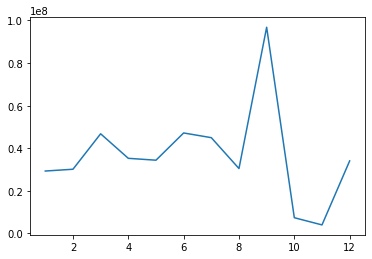

In [ ]:
# Se les cambia el nombre para que queden mas cortos
df_model.columns = ['YM','Amount']

# Se agrupan los datos por mes
df_model_gp = df_model.groupby(['YM'],as_index=False).sum()
# Se ordenen por año y mes
df_model_gp.sort_values('YM', ascending=True)
# Se crea una columna periodo que va del 1 a n
df_model_gp['Periodo'] = range(1,len(df_model_gp)+1)
# Se selecciona solo el periodo y el monto
df_final = df_model_gp[['Periodo','Amount']]
# Se muestra la gráfica
plt.plot(df_model_gp['Periodo'], df_model_gp['Amount'])

In [ ]:
x = df_final[['Periodo']] # independientes
y = df_final[['Amount']] #dependiente
#Entre el mes 8 y 10 vemos que se da las transacciones con mayor mopnto economico, mintras que entre los meses 10 y 11 se da las transacciones dse menor monto.


In [ ]:
x

,Periodo
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

model = regresion.fit(x, y)

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


Intersección (b) [40498218.73590909]
Pendiente (m) [[-576932.06898601]]


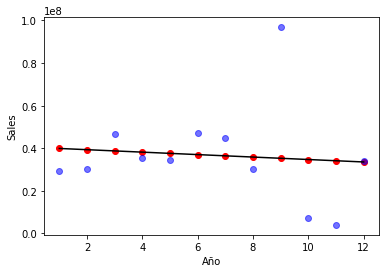

R^2 0.00797317873865866


In [ ]:
y_1 = model.predict(x)

plt.scatter(x.Periodo, y_1, color="red")
plt.plot(x.Periodo, y_1, color="black")

plt.ylabel("Sales")
plt.xlabel("Año")
plt.scatter(df_final["Periodo"], df_final["Amount"], color="blue", alpha=0.55)
plt.show()
print('R^2', model.score(x, y))
# Se puede ver que el R^2 es muy bajo

Por mas que hay una tendencia en 0.4, si miramos el r2 que sabemos que va de 0 a 1, vemos que es de 0.0079l, por lo tanto es muy pequeño y no podemos tomarlo como representativo. Vamos a seguir probando posibles modelos para utilizar el que tenga mayor R^2



### Para mejorar el modelo y que se adapte mas a los datos, existe la posibilidad de cambiar la función aumentando los grados de la función, para que de esta forma no sea lineal. Esto se hace con la función 'PolynomialFeatures'

w_1 9027595.052280225
w_2 -738809.7785589417
R^2 0.13000811717268712


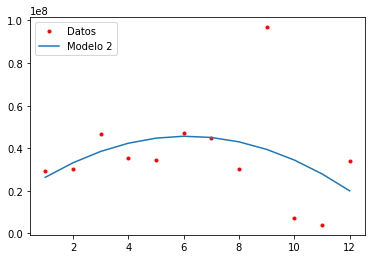

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2, include_bias = False)
x_2     = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = True)
model_2.fit(x_2, y)

# Obtención de los parametros de ajuste
print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
print('R^2', model_2.score(x_2, y))

y_2 = model_2.predict(poly_2.fit_transform(x))

plt.plot(x.Periodo, y.Amount, 'r.', label = 'Datos')
plt.plot(x.Periodo, y_2, label = 'Modelo 2')
plt.legend(loc = 2)
plt.show()

Este modelo vemos que muestra que en el mes 4 empieza a subir y luego decrece al llegar al 8, siendo el mes 6 el mes con transacciones mas alto. 
De todas maneras, el r2 si bien es mayor al anterior, sigue siendo pequeño.

w_1 144132428.75864118
w_2 -67796120.98042837
w_3 13628792.744878769
w_4 -1200973.7927817889
w_5 38098.644909873605
R^2 0.3286668249424981


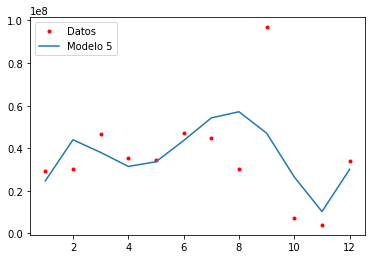

In [ ]:
# Polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = True)
model_5.fit(x_5, y)


# Obtención de los parametros de ajuste
print('w_1', model_5.coef_[0][0])
print('w_2', model_5.coef_[0][1])
print('w_3', model_5.coef_[0][2])
print('w_4', model_5.coef_[0][3])
print('w_5', model_5.coef_[0][4])
print('R^2', model_5.score(x_5, y))

y_5 = model_5.predict(poly_5.fit_transform(x))

plt.plot(x.Periodo, y.Amount, 'r.', label = 'Datos')
plt.plot(x.Periodo, y_5, label = 'Modelo 5')
plt.legend(loc = 2)
plt.show()

Este modelo tiene un r2 de 0.32. El R^2 aumenta con fespecto al modelo anterior, pero sigue siendo muy bajo entonces no es un modelo muy confiable. Muestra las fluctuaciones que hay durante el año. Observamos que hay un valor que podría estaar distorcionando el modelo.

w_1 21092586182.08959
w_2 -24312286564.27532
w_3 15191433452.811218
w_4 -5765482940.926164
w_5 1401777396.0664878
R^2 0.9640879180287991


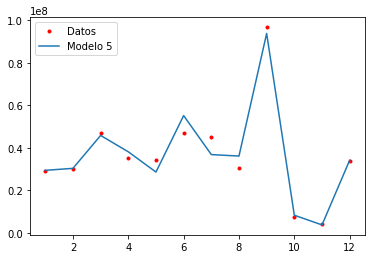

In [ ]:
# Polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 10, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = True)
model_5.fit(x_5, y)


# Obtención de los parametros de ajuste
print('w_1', model_5.coef_[0][0])
print('w_2', model_5.coef_[0][1])
print('w_3', model_5.coef_[0][2])
print('w_4', model_5.coef_[0][3])
print('w_5', model_5.coef_[0][4])
print('R^2', model_5.score(x_5, y))

y_5 = model_5.predict(poly_5.fit_transform(x))

plt.plot(x.Periodo, y.Amount, 'r.', label = 'Datos')
plt.plot(x.Periodo, y_5, label = 'Modelo 5')
plt.legend(loc = 2)
plt.show()

#vemos que es el modelo más confiable por el R^2

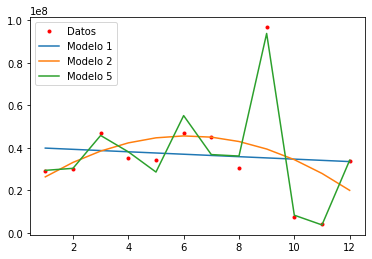

In [ ]:
#grafico de todos los posibles modelos
plt.plot(x.Periodo, y.Amount, 'r.', label = 'Datos')
plt.plot(x.Periodo, y_1, label = 'Modelo 1')
plt.plot(x.Periodo, y_2, label = 'Modelo 2')
plt.plot(x.Periodo, y_5, label = 'Modelo 5')
plt.legend(loc = 2)

array([34193402.25820351])

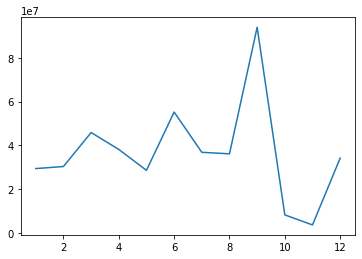

In [ ]:
# Se va a utilizar el modelo que tuvo mayor R^2 
# Pruebo predecir las ventas para el inicio del año siguiente, que sería el periodo 13 (12+1)
x_p = [[i] for i in range(1, 13)]

y_pred_5 = model_5.predict(poly_5.fit_transform(x_p))
plt.plot(x_p, y_pred_5, label = 'Predicción')

y_pred_5[-1]

array([-2.37270451e+13])

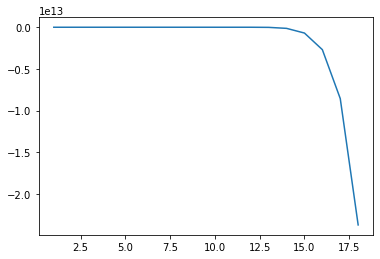

In [ ]:
# Pruebo predecir las ventas para el inicio del año siguiente, que sería el periodo 18 (12+6)
x_p = [[i] for i in range(1, 19)]

y_pred_5 = model_5.predict(poly_5.fit_transform(x_p))
plt.plot(x_p, y_pred_5, label = 'Predicción')

y_pred_5[-1]

# El Modelo sirve como modelo predictivo a corto plazo, ya que tenemos solo datos de un año por lo que es imposible que el modelo pueda predecir las ventas y los montos para dentro de cinco años. 